<a href="https://www.kaggle.com/code/tuandino/geographic-and-customer-segmentation-analysis?scriptVersionId=102773736" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# Import dataset

Context
- With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

- You can even take this a step further and try and build a Regression model to predict Sales or Profit.

- Go crazy with the dataset, but also make sure to provide some business insights to improve.

In [2]:
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252',parse_dates=['Order Date','Ship Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Product:

#### Which products should they target overall? Base on profit made

In [4]:
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending = False)

In [5]:
top_product_profit = product_profit.head(10)

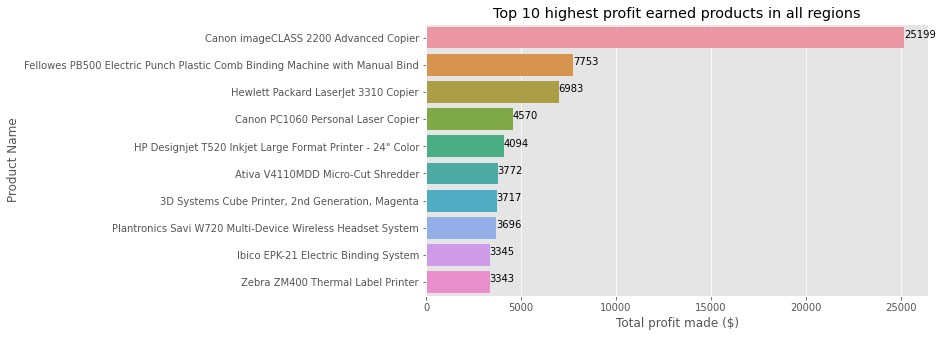

In [6]:
sns.barplot(top_product_profit, top_product_profit.index)
for i,v in enumerate(top_product_profit):
    plt.text(v,i,str(int(v)))
plt.xlabel('Total profit made ($)')
plt.title('Top 10 highest profit earned products in all regions');

Canon imageCLASS 2200 Advanced Copier made the most profit. This should be the key product in the future.

#### Top products with high quantity sold?

In [7]:
quantity_sold = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending = False)

In [8]:
top_quantity_sold = quantity_sold.head(10)
top_quantity_sold

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

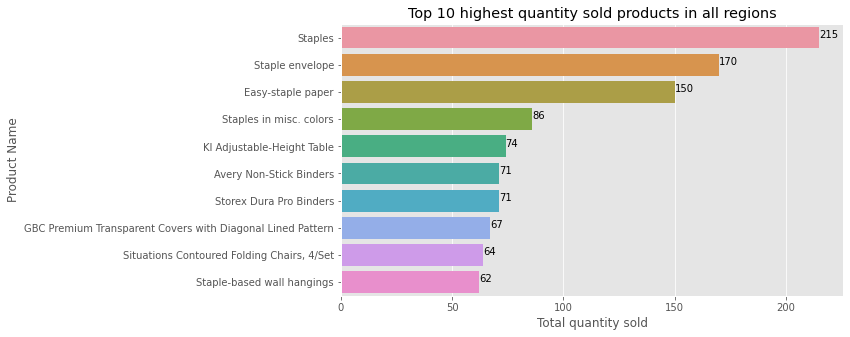

In [9]:
sns.barplot(top_quantity_sold, top_quantity_sold.index)
for i,v in enumerate(top_quantity_sold):
    plt.text(v,i,str(int(v)))
plt.xlabel('Total quantity sold')
plt.title('Top 10 highest quantity sold products in all regions');

We can apply some promotion for these products like BOGO, Buy X Get Y,... to further encourage people to buy it in large quantity. We can also use these products as a giveaways to encourage people buy expensive products.

# Regions

#### Which regions bring the most benefit? Which regions should we avoid, which to focus on?

In [10]:
region_profit = df.groupby('City')['Profit'].sum().sort_values(ascending = False)
region_profit

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
                    ...    
Chicago          -6654.5688
Lancaster        -7239.0684
San Antonio      -7299.0502
Houston         -10153.5485
Philadelphia    -13837.7674
Name: Profit, Length: 531, dtype: float64

We can see that some regions have negative profit earned, the companies should not focus on these regions

In [11]:
negative_region = region_profit[region_profit < 0]
positive_region = region_profit[region_profit > 0]

In [12]:
top_positive_region = positive_region.head(10)
top_negative_region = negative_region.tail(10)

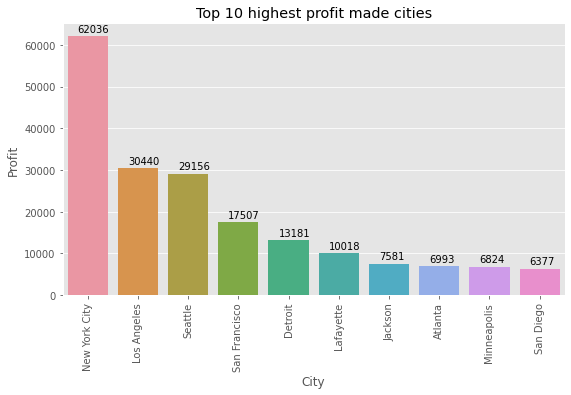

In [13]:
sns.barplot(top_positive_region.index, top_positive_region)
for i,v in enumerate(top_positive_region):
    plt.text(i - 0.2,v+1000,str(int(v)))
plt.title('Top 10 highest profit made cities')
plt.xticks(rotation = 90);

In [14]:
print(f'Top 10 cities to focus on are:{top_positive_region.index}')

Top 10 cities to focus on are:Index(['New York City', 'Los Angeles', 'Seattle', 'San Francisco', 'Detroit',
       'Lafayette', 'Jackson', 'Atlanta', 'Minneapolis', 'San Diego'],
      dtype='object', name='City')


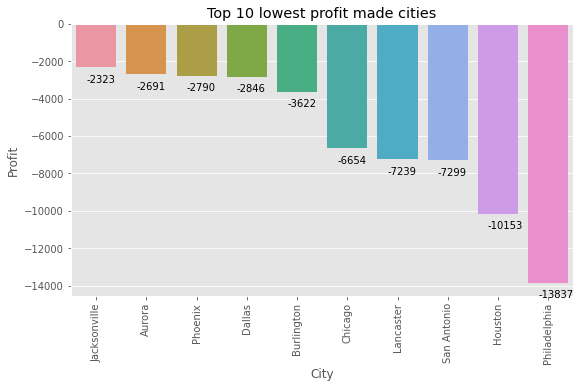

In [15]:
sns.barplot(top_negative_region.index, top_negative_region)
for i,v in enumerate(top_negative_region):
    plt.text(i-0.2,v - 800,str(int(v)))
plt.title('Top 10 lowest profit made cities')
plt.xticks(rotation = 90);

In [16]:
print(f'Top 10 cities to avoid are:{top_negative_region.index}')

Top 10 cities to avoid are:Index(['Jacksonville', 'Aurora', 'Phoenix', 'Dallas', 'Burlington', 'Chicago',
       'Lancaster', 'San Antonio', 'Houston', 'Philadelphia'],
      dtype='object', name='City')


#### Which regions has the highest sales?

In [17]:
region_sales = df.groupby('City')['Sales'].sum().sort_values(ascending = False)

In [18]:
top_region_sales = region_sales.head(10)

In [19]:
appear_both = set(list(top_region_sales.index))  & set(list(top_positive_region.index))

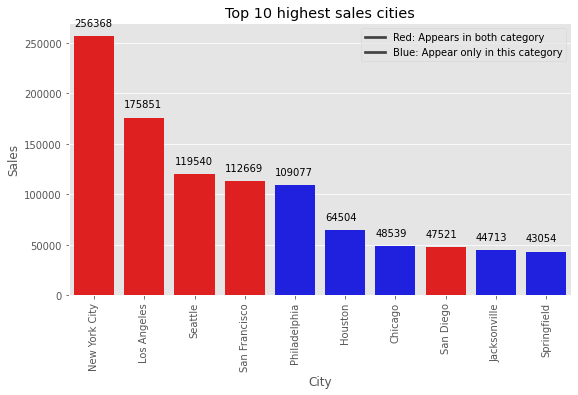

In [20]:
colors = ['red' if cntry in appear_both else 'blue' for cntry in top_region_sales.index]
sns.barplot(top_region_sales.index, top_region_sales, palette = colors)
for i,v in enumerate(top_region_sales):
    plt.text(i - 0.4,v + 10000,str(int(v)))
plt.legend(['Red: Appears in both category','Blue: Appear only in this category'])
plt.title('Top 10 highest sales cities')
plt.xticks(rotation = 90);

In [21]:
print(f'Cities that both appear in the highest benefit and highest sales are: {appear_both}')

Cities that both appear in the highest benefit and highest sales are: {'New York City', 'Los Angeles', 'San Francisco', 'Seattle', 'San Diego'}


Its safe to say that we should focus on New York City as this region not only brings great benefit but also has high sales. Follow up by Los Angeles.

# Customer segmentation

#### Sales and profit distribution of each customers in New York City

In [22]:
customers_profit = df[df['City'] == 'New York City'].groupby(['Customer ID','Customer Name'])['Profit'].sum().sort_values(ascending = False)

In [23]:
customers_profit.head(10)

Customer ID  Customer Name   
TA-21385     Tom Ashbrook        4599.2073
KD-16495     Keith Dawkins       2510.8903
NM-18445     Nathan Mautz        2247.1904
TB-21400     Tom Boeckenhauer    2239.9872
SR-20740     Steven Roelle       1863.9614
PK-19075     Pete Kriz           1695.3209
DM-13015     Darrin Martin       1599.6806
TS-21370     Todd Sumrall        1574.9714
SV-20365     Seth Vernon         1571.7964
AB-10060     Adam Bellavance     1453.4346
Name: Profit, dtype: float64

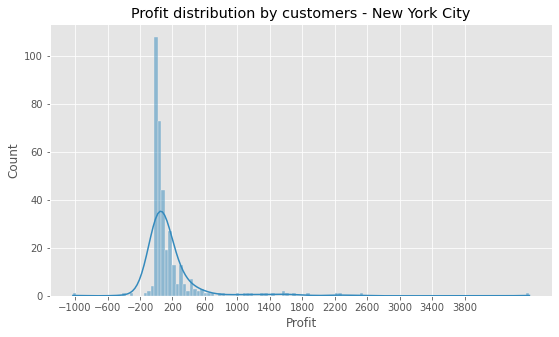

In [24]:
sns.histplot(x = customers_profit, kde = True)
plt.title('Profit distribution by customers - New York City')
plt.xticks(np.arange(-1000,4000,400));

In [25]:
customers_profit.describe()

count     355.000000
mean      174.752067
std       422.429576
min     -1027.403500
25%        13.041500
50%        54.666000
75%       167.545000
max      4599.207300
Name: Profit, dtype: float64

In [26]:
customers_sales = df[df['City'] == 'New York City'].groupby(['Customer ID','Customer Name'])['Sales'].sum().sort_values(ascending = False)

In [27]:
customers_sales.head(10)

Customer ID  Customer Name   
TA-21385     Tom Ashbrook        13723.498
PF-19120     Peter Fuller         7678.228
SV-20365     Seth Vernon          7359.918
TB-21400     Tom Boeckenhauer     6999.960
TS-21370     Todd Sumrall         6492.314
KD-16495     Keith Dawkins        5854.194
CJ-12010     Caroline Jumper      4835.976
NM-18445     Nathan Mautz         4821.292
PK-19075     Pete Kriz            4816.690
AB-10060     Adam Bellavance      4438.686
Name: Sales, dtype: float64

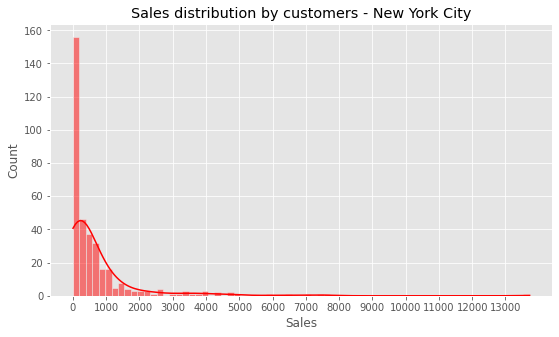

In [28]:
sns.histplot(x = customers_sales, kde = True, color = 'red')
plt.title('Sales distribution by customers - New York City')
plt.xticks(np.arange(0,14000,1000));

In [29]:
customers_sales.describe()

count      355.000000
mean       722.163834
std       1345.082209
min          3.640000
25%         62.200000
50%        279.810000
75%        754.284000
max      13723.498000
Name: Sales, dtype: float64

We can see that most of the customers sales are around 0 - 1000 range => We should have campaign to appreciate loyal customers such as Tom Ashbrooks and encourage them to buy more.

#### Analyze the important of the top 20% customers

* By profit

In [30]:
profit_top_20 = customers_profit.head(int(len(customers_profit)*0.2))

In [31]:
total_profit_top_20 = profit_top_20.sum()
total_profit_top_20

49205.433000000005

In [32]:
print(f'The top 20 percent customers make up for: {total_profit_top_20/(customers_profit.sum())} of the profit in New York City')

The top 20 percent customers make up for: 0.7931628855127589 of the profit in New York City


* By sales

In [33]:
sales_top_20 = customers_sales.head(int(len(customers_sales)*0.2))

In [34]:
total_sales_top_20 = sales_top_20.sum()
total_sales_top_20

181785.56100000002

In [35]:
print(f'The top 20 percent customers make up for: {total_sales_top_20/(customers_sales.sum())} of the sales in New York City')

The top 20 percent customers make up for: 0.7090800990689324 of the sales in New York City


The top 20 percent customers - Sales make up for 70% of the sales in New York City => We should focus on giving more promotion to these customers to boost sales.
Same with top 20 percent customers - Profit. They make up for roughly 80% profit

#### Scatterplot of sales and profit by order - New York City by customers (top 20 and bottom 80 by profit and sales)

* By sales

In [36]:
newyork = df[df['City'] == 'New York City']

In [37]:
sales_top_20_customer_id = sales_top_20.index.get_level_values(level = 0)

In [38]:
newyork['customer_segment_by_sales'] = np.nan
newyork.loc[newyork['Customer ID'].apply(lambda x: x in sales_top_20_customer_id), 'customer_segment_by_sales'] = 'Top 20%'
newyork.loc[newyork['customer_segment_by_sales'].apply(lambda x: x != 'Top 20%'), 'customer_segment_by_sales'] = 'Bottom 80%'

In [39]:
profit_top_20_customer_id = profit_top_20.index.get_level_values(level = 0)

In [40]:
newyork['customer_segment_by_profit'] = np.nan
newyork.loc[newyork['Customer ID'].apply(lambda x: x in profit_top_20_customer_id), 'customer_segment_by_profit'] = 'Top 20%'
newyork.loc[newyork['customer_segment_by_profit'].apply(lambda x: x != 'Top 20%'), 'customer_segment_by_profit'] = 'Bottom 80%'

Let's aggregate by order id because one order can be seperated and shipped multiple time and we want to do scatterplot of sales and profit by order

In [41]:
newyork2 = newyork.groupby('Order ID').agg({'Sales':'sum','Profit':'sum','customer_segment_by_profit':'first','customer_segment_by_sales':'first'})

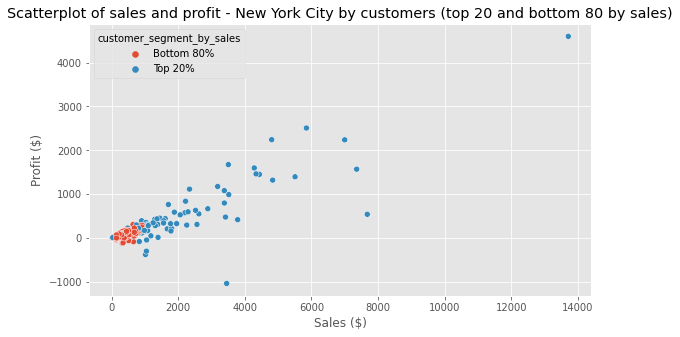

In [42]:
sns.scatterplot(data = newyork2, x = 'Sales', y = 'Profit',hue = 'customer_segment_by_sales')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.title('Scatterplot of sales and profit - New York City by customers (top 20 and bottom 80 by sales)');

* By profit

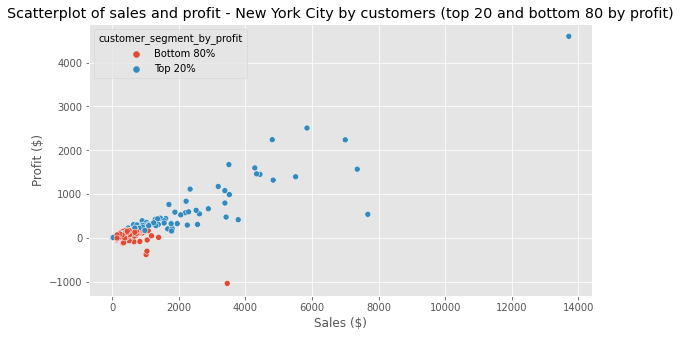

In [43]:
sns.scatterplot(data = newyork2, x = 'Sales', y = 'Profit',hue = 'customer_segment_by_profit')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.title('Scatterplot of sales and profit - New York City by customers (top 20 and bottom 80 by profit)');

This indicates a high correlation between sales and profit.

In [44]:
print('The correlation coefficient score between sales and profit in newyork city is: {}'.format(newyork[['Sales','Profit']].corr().iloc[0][1]))

The correlation coefficient score between sales and profit in newyork city is: 0.8950193825712035


We can see that the correlation coefficient score between Sales and Profit is very high. This indicates that the higher value order often bring more benefits and the other way around. The scatterplot points out that bottom 80% customers (by Sales and Profit) often buy lower value order therefore bring less benefit.

The top 20% customers tend to have high value order by the look of the scatterplot. Let's see if this theory is right.

#### Average value and profit of each order by customer segment (sales)

In [45]:
avg_value = newyork2.groupby('customer_segment_by_sales')['Sales'].mean()

In [46]:
avg_profit = newyork2.groupby('customer_segment_by_sales')['Profit'].mean()

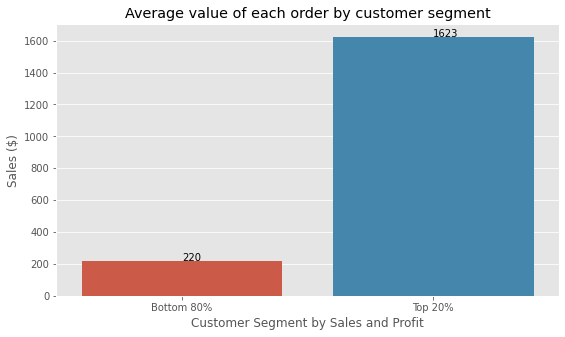

In [47]:
sns.barplot(avg_value.index, avg_value)
for i,v in enumerate(avg_value):
    plt.text(i,v,str(int(v)))
plt.xlabel('Customer Segment by Sales and Profit')
plt.ylabel('Sales ($)')
plt.title('Average value of each order by customer segment');

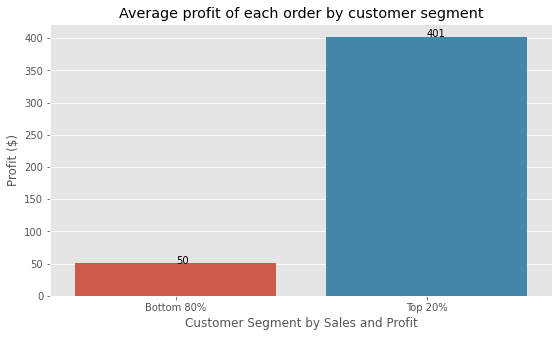

In [48]:
sns.barplot(avg_profit.index, avg_profit)
for i,v in enumerate(avg_profit):
    plt.text(i,v,str(int(v)))
plt.xlabel('Customer Segment by Sales and Profit')
plt.ylabel('Profit ($)')
plt.title('Average profit of each order by customer segment');

The above theory is true. Top 20% customers by sales tend to have higher average order value.

#### Which category are being bought the most by Top 20 and Bottom 80 in New York (by sales)

In [49]:
top_20_category = newyork[newyork['customer_segment_by_sales'] == 'Top 20%']['Sub-Category'].value_counts()

In [50]:
top_20_category_df = top_20_category.to_frame().reset_index()
top_20_category_df.loc[top_20_category_df['Sub-Category'] < 28, 'index'] = 'Others'
top_20_category_df = top_20_category_df.groupby('index')['Sub-Category'].sum()

''

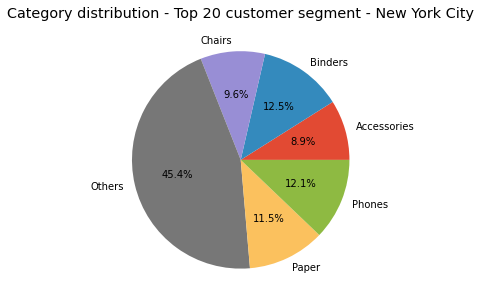

In [51]:
plt.pie(x = top_20_category_df, labels = top_20_category_df.index, autopct= '%2.1f%%')
plt.title('Category distribution - Top 20 customer segment - New York City')
;

In [52]:
bottom_80_category = newyork[newyork['customer_segment_by_sales'] == 'Bottom 80%']['Sub-Category'].value_counts()

In [53]:
bottom_80_category_df = bottom_80_category.to_frame().reset_index()
bottom_80_category_df.loc[bottom_80_category_df['Sub-Category'] < 51, 'index'] = 'Others'
bottom_80_category_df = bottom_80_category_df.groupby('index')['Sub-Category'].sum()

''

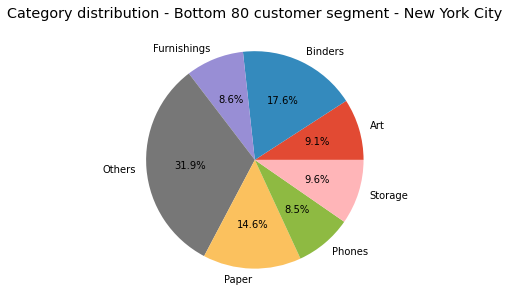

In [54]:
plt.pie(x = bottom_80_category_df, labels = bottom_80_category_df.index, autopct= '%2.1f%%')
plt.title('Category distribution - Bottom 80 customer segment - New York City')
;

Binders appear in top category bought by top 20 and bottom 80 because it's cheap and people buy it often. We'll choose binder as the key category for bottom 80. For top 20 we'll choose phone category because it has high value and is top 2 right behind binder

#### Which category is most often being sold together with phone for top 20 and most often being sold together with binder for bottom 80

* Which category is most often being sold together with phone for top 20

In [55]:
from itertools import combinations
from collections import Counter

In [56]:
newyork_top_20 = newyork[newyork['customer_segment_by_sales'] == 'Top 20%']

In [57]:
newyork_top_20 = newyork_top_20.groupby('Order ID').agg({'Sub-Category':'!'.join})
newyork_top_20['Sub-Category'] = newyork_top_20['Sub-Category'].str.split('!')

In [58]:
newyork_top_20_phones = newyork_top_20[newyork_top_20['Sub-Category'].apply(lambda x: 'Phones' in x )]

In [59]:
count = Counter()
for rows in newyork_top_20_phones['Sub-Category']:
    count.update(Counter(combinations(rows,2)))

In [60]:
count.most_common(5)

[(('Chairs', 'Phones'), 12),
 (('Chairs', 'Accessories'), 10),
 (('Phones', 'Accessories'), 10),
 (('Phones', 'Paper'), 9),
 (('Binders', 'Phones'), 9)]

It seems like phones are often being sold together with chairs and accessories. Chairs seem really awkward but we can actually give a free accessory whenever a top-20 customer buy a phone online to boost sales.

* Which category is most often being sold together with binders for bottom 80

In [61]:
newyork_bottom_80 = newyork[newyork['customer_segment_by_sales'] == 'Bottom 80%']

In [62]:
newyork_bottom_80 = newyork_bottom_80.groupby('Order ID').agg({'Sub-Category':'!'.join})
newyork_bottom_80['Sub-Category'] = newyork_bottom_80['Sub-Category'].str.split('!')

In [63]:
newyork_bottom_80_binders = newyork_top_20[newyork_top_20['Sub-Category'].apply(lambda x: 'Binders' in x )]

In [64]:
count2 = Counter()
for rows in newyork_bottom_80_binders['Sub-Category']:
    count2.update(Counter(combinations(rows,2)))

In [65]:
count2.most_common(5)

[(('Binders', 'Phones'), 9),
 (('Chairs', 'Accessories'), 9),
 (('Binders', 'Chairs'), 8),
 (('Paper', 'Binders'), 7),
 (('Accessories', 'Paper'), 7)]

Binders and Paper seems a good choice to upsell for bottom 80

#### Shipmode distribution for top 20 and bottom 80

In [66]:
shipmode_top_20 = newyork[newyork['customer_segment_by_sales'] == 'Top 20%']['Ship Mode'].value_counts()

In [67]:
shipmode_top_20

Standard Class    176
First Class        60
Second Class       41
Same Day           36
Name: Ship Mode, dtype: int64

In [68]:
shipmode_bottom_80 = newyork[newyork['customer_segment_by_sales'] == 'Bottom 80%']['Ship Mode'].value_counts()

In [69]:
shipmode_bottom_80

Standard Class    373
Second Class      126
First Class        87
Same Day           16
Name: Ship Mode, dtype: int64

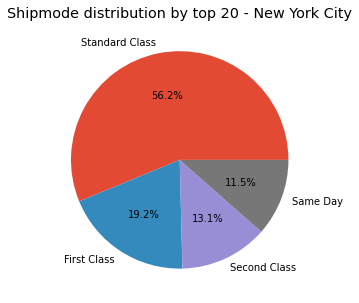

In [70]:
plt.pie(x = shipmode_top_20, labels = shipmode_top_20.index, autopct='%2.1f%%')
plt.title('Shipmode distribution by top 20 - New York City');

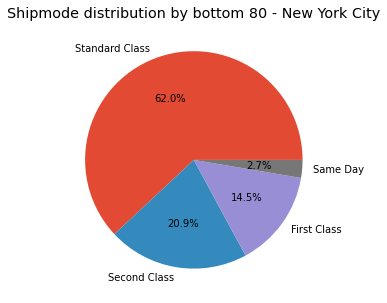

In [71]:
plt.pie(x = shipmode_bottom_80, labels = shipmode_bottom_80.index, autopct='%2.1f%%')
plt.title('Shipmode distribution by bottom 80 - New York City');

We can see that top 20 customers tend to use First Class and Same Day shipmode more often than bottom 80. We can offer them promotion regarding these 2 shipmodes to encourage them to buy more.

# Forecast sales and profit with NeuralProphet (to be updated)

We'll use neuralprophet to forecast sales and profit of all regions for next 1 year

* Sales

In [72]:
pip install neuralprophet

     |████████████████████████████████| 74 kB 450 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [73]:
from neuralprophet import NeuralProphet

In [74]:
df_sales_forecast = df.groupby('Ship Date').agg({'Sales':'sum'})

In [75]:
df_sales_forecast.reset_index(inplace = True)

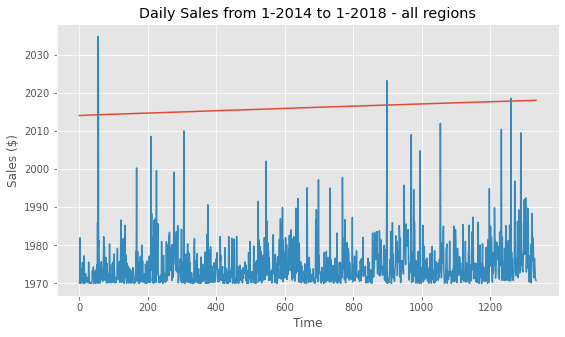

In [76]:
plt.plot(df_sales_forecast)
plt.title('Daily Sales from 1-2014 to 1-2018 - all regions')
plt.xlabel('Time')
plt.ylabel('Sales ($)');

In [77]:
df_sales_forecast.columns = ['ds','y']

In [78]:
m = NeuralProphet()
m.fit(df_sales_forecast, freq = 'd')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 91.454% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 177


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.72E-01, min: 8.81E-01


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.97E-02, min: 1.22E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.16E-01
Epoch[177/177]: 100%|██████████| 177/177 [00:11<00:00, 14.97it/s, SmoothL1Loss=0.0581, MAE=1.26e+3, RMSE=1.88e+3, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.746451,6411.445895,7610.906036,0.0
1,0.678698,6016.977080,7137.966792,0.0
2,0.600104,5551.628889,6601.837427,0.0
3,0.502587,4960.026176,5884.967473,0.0
4,0.387036,4222.847792,5044.176053,0.0
...,...,...,...,...
172,0.058131,1265.478523,1915.535517,0.0
173,0.058100,1264.191156,1912.325299,0.0
174,0.058071,1263.715351,1899.327069,0.0
175,0.058066,1263.652353,1894.542333,0.0


In [79]:
future = m.make_future_dataframe(df_sales_forecast, periods = 365)
sales_forecast = m.predict(future)
sales_forecast.head(10)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 91.454% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - d


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2018-01-06,None,2289.934814,NaN,2265.349854,-199.876358,224.461304
1,2018-01-07,None,1896.793335,NaN,2267.236572,-225.821106,-144.622162
2,2018-01-08,None,1667.783813,NaN,2269.123535,-250.395096,-350.944702
3,2018-01-09,None,2034.189209,NaN,2271.010254,-273.720734,36.899567
4,2018-01-10,None,2167.136230,NaN,2272.897461,-295.925995,190.165024
5,2018-01-11,None,1847.955566,NaN,2274.783936,-317.142090,-109.686378
6,2018-01-12,None,2092.896973,NaN,2276.671143,-337.501434,153.727341
7,2018-01-13,None,2145.883301,NaN,2278.557861,-357.135742,224.461304
8,2018-01-14,None,1759.648926,NaN,2280.444824,-376.173645,-144.622162
9,2018-01-15,None,1536.648071,NaN,2282.331787,-394.738983,-350.944702


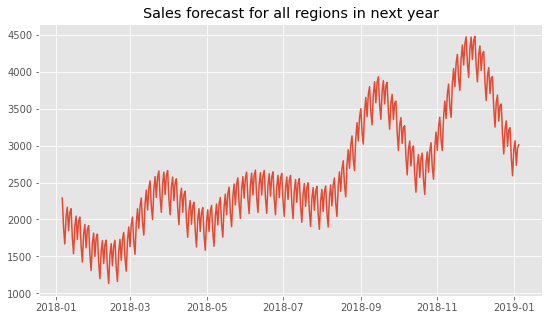

In [80]:
plt.plot(sales_forecast.ds, sales_forecast.yhat1)
plt.title('Sales forecast for all regions in next year');

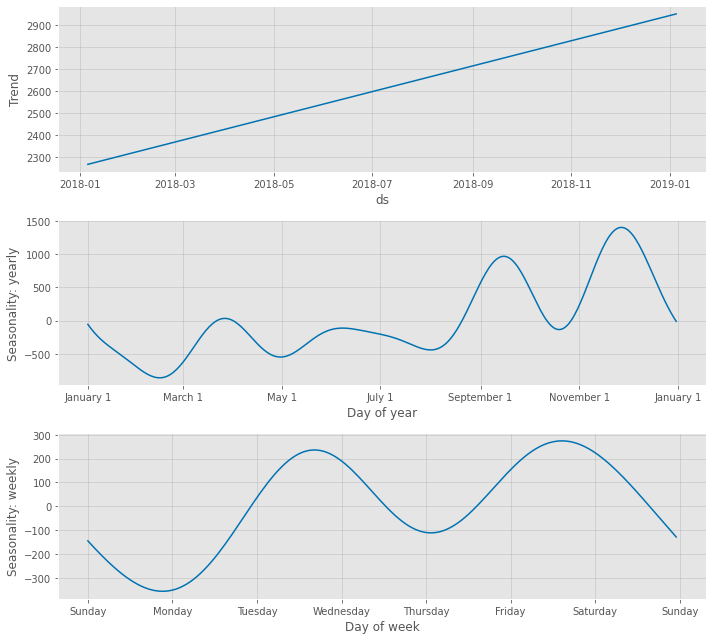

In [81]:
m.plot_components(sales_forecast);

We can see that the sales peak right after November and just before January. Monday seems to be low on sales, contradict to Friday.